# Sentiment Analysis Tweets

## Extract Data

In [255]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#Train Data
trainDf =  pd.read_csv('Train.txt', sep='	', names=["id","text","emotion","intensity"], engine='python')
trainDf=trainDf.drop("id",axis=1)
print("Initial Shape of train data:",trainDf.shape)

AngerDf = trainDf[trainDf["emotion"]=="anger"].drop("emotion",axis=1)
AngerDf = AngerDf[AngerDf["intensity"]>=0.4]
AngerDf["emotion"] = 0

FearDf = trainDf[trainDf["emotion"]=="fear"].drop("emotion",axis=1)
FearDf = FearDf[FearDf["intensity"]>=0.4]
FearDf["emotion"] = 1

JoyDf = trainDf[trainDf["emotion"]=="joy"].drop("emotion",axis=1)
JoyDf = JoyDf[JoyDf["intensity"]>=0.4]
JoyDf["emotion"] = 2

SadDf = trainDf[trainDf["emotion"]=="sadness"].drop("emotion",axis=1)
SadDf = SadDf[SadDf["intensity"]>=0.4]
SadDf["emotion"] = 3

trainDf = pd.concat([AngerDf,FearDf,JoyDf,SadDf],ignore_index=True)
print("Final shape of train dataset:",trainDf.shape)
print(trainDf.head(10))
print()


#Cross Validation Data
crossValDf =  pd.read_csv('CrossValidate.txt', sep='	', names=["id","text","emotion","intensity"], engine='python')
crossValDf=crossValDf.drop("id",axis=1)
print("Initial Shape of CV data:",crossValDf.shape)


AngerDf = crossValDf[crossValDf["emotion"]=="anger"].drop("emotion",axis=1)
AngerDf = AngerDf[AngerDf["intensity"]>0.4]
AngerDf["emotion"] = 0

FearDf = crossValDf[crossValDf["emotion"]=="fear"].drop("emotion",axis=1)
FearDf = FearDf[FearDf["intensity"]>=0.4]
FearDf["emotion"] = 1

JoyDf = crossValDf[crossValDf["emotion"]=="joy"].drop("emotion",axis=1)
JoyDf = JoyDf[JoyDf["intensity"]>=0.4]
JoyDf["emotion"] = 2

SadDf = crossValDf[crossValDf["emotion"]=="sadness"].drop("emotion",axis=1)
SadDf = SadDf[SadDf["intensity"]>=0.4]
SadDf["emotion"] = 3

crossValDf = pd.concat([AngerDf,FearDf,JoyDf,SadDf],ignore_index=True)
print("Final shape of CV data:",crossValDf.shape)
print(crossValDf.head(10))
print()


#Test Data
testDf =  pd.read_csv('Test.txt', sep='	', names=["id","text","emotion","intensity"], engine='python')
testDf=testDf.drop("id",axis=1)
print("Initial Shape of Test data:",testDf.shape)


AngerDf = testDf[testDf["emotion"]=="anger"].drop("emotion",axis=1)
AngerDf = AngerDf[AngerDf["intensity"]>=0.4]
AngerDf["emotion"] = 0

FearDf = testDf[testDf["emotion"]=="fear"].drop("emotion",axis=1)
FearDf = FearDf[FearDf["intensity"]>=0.4]
FearDf["emotion"] = 1

JoyDf = testDf[testDf["emotion"]=="joy"].drop("emotion",axis=1)
JoyDf = JoyDf[JoyDf["intensity"]>=0.4]
JoyDf["emotion"] = 2

SadDf = testDf[testDf["emotion"]=="sadness"].drop("emotion",axis=1)
SadDf = SadDf[SadDf["intensity"]>=0.4]
SadDf["emotion"] = 3

testDf = pd.concat([AngerDf,FearDf,JoyDf,SadDf],ignore_index=True)
print("Final shape of Test data:",testDf.shape)
print(testDf.head(10))

Initial Shape of train data: (3317, 3)
Final shape of train dataset: (2394, 3)
                                                text  intensity  emotion
0  How the fu*k! Who the heck! moved my fridge!.....      0.938        0
1  So my Indian Uber driver just called someone t...      0.896        0
2  @DPD_UK I asked for my parcel to be delivered ...      0.896        0
3  so ef whichever butt wipe pulled the fire alar...      0.896        0
4  Don't join @BTCare they put the phone down on ...      0.896        0
5                                My blood is boiling      0.875        0
6  When you've still got a whole season of Wentwo...      0.875        0
7  @bt_uk why does tracking show my equipment del...      0.875        0
8  @TeamShanny legit why i am so furious with him...      0.875        0
9  How is it suppose to work if you do that? Wtf ...      0.875        0

Initial Shape of CV data: (347, 3)
Final shape of CV data: (228, 3)
                                                t

In [256]:
data_train= trainDf.drop(["intensity"],axis=1)
data_cv   = crossValDf.drop(["intensity"],axis=1)
data_test = testDf.drop(["intensity"],axis=1)

# emotion=0 means anger
# emotion=1 means fear
# emotion=2 means joy
# emotion=3 means sadness

## Text Cleaning

In [257]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")

#Get set of english stop words and prepare stemmer
#Stop words for bag of words are different because we will use bigrams
stop=set(stopwords.words("english"))
stop_bow = set(stopwords.words("english"))
stop_bow.discard("not")
stop_bow.discard("no")
sno = nltk.stem.SnowballStemmer("english")

#Train data cleaning
train_text=data_train["text"]
cleaned_text_bow=[]
cleaned_text=[]
for line in train_text:
    #Removing tags(ex-@abhishek is a name and not needed)
    tags = re.compile("^@[a-zA-Z_]*")
    line = re.sub(tags," ",line)
    #Replacing # and * with a ""
    hashtags = re.compile("#|\*")
    line = re.sub(hashtags,"",line)
    #Replacing all other characters with a space
    extraCharacters = re.compile("[^a-zA-Z]")
    line = re.sub(extraCharacters," ",line)

    #Conversion of line to array of words for word2vec
    filtered_words=[]
    filtered_words_bow=""
    for word in line.split():
        word=word.lower()
        if(word not in stop):
            word = sno.stem(word)
            filtered_words.append(word)
        if(word not in stop_bow):
            word = sno.stem(word)
            filtered_words_bow+=" "+word
    cleaned_text.append(filtered_words)
    cleaned_text_bow.append(filtered_words_bow)
            
data_train_bow = pd.DataFrame(data=cleaned_text_bow,columns=["text"])
data_train_bow["emotion"] = data_train["emotion"]
data_train["text"]=cleaned_text
print(data_train.head(10))
print()
print(data_train_bow.head(10))
print()

#Cross Validate data cleaning
cv_text=data_cv["text"][0:]
cleaned_text=[]
cleaned_text_bow=[]
for line in cv_text:
    #Removing tags(ex-@abhishek is a name and not needed)
    tags = re.compile("^@[a-zA-Z_]*")
    line = re.sub(tags," ",line)
    #Replacing # and * with "" 
    hashtags = re.compile("#|\*")
    line = re.sub(hashtags,"",line)
    #Replacing all other characters with a space
    extraCharacters = re.compile("[^a-zA-Z]")
    line = re.sub(extraCharacters," ",line)
    
    #Conversion of line to array of words
    filtered_words=[]
    filtered_words_bow=""
    for word in line.split():
        word=word.lower()
        if(word not in stop):
            word = sno.stem(word)
            filtered_words.append(word)
            filtered_words_bow+=" "+word
    cleaned_text.append(filtered_words)
    cleaned_text_bow.append(filtered_words_bow)
            
data_cv_bow = pd.DataFrame(data=cleaned_text_bow, columns=["text"])
data_cv_bow["emotion"]=data_cv["emotion"]
data_cv["text"]=cleaned_text
print(data_cv.head(10))
print()
print(data_cv_bow.head(10))
print()

#Test data cleaning
test_text=data_test["text"][0:]
cleaned_text=[]
cleaned_text_bow=[]
for line in test_text:
    #Removing tags(ex-@abhishek is a name and not needed)
    tags = re.compile("^@[a-zA-Z_]*")
    line = re.sub(tags," ",line)
    #Replacing hash and * with ""
    hashtags = re.compile("#|\*")
    line = re.sub(hashtags,"",line)
    #Replacing all other characters with a space
    extraCharacters = re.compile("[^a-zA-Z]")
    line = re.sub(extraCharacters," ",line)
    
    #Conversion of line to array of words
    filtered_words=[]
    filtered_words_bow=""
    for word in line.split():
        word=word.lower()
        if(word not in stop):
            word = sno.stem(word)
            filtered_words.append(word)
            filtered_words_bow+=" "+word
    cleaned_text.append(filtered_words)
    cleaned_text_bow.append(filtered_words_bow)
            
data_test_bow = pd.DataFrame(data=cleaned_text_bow, columns=["text"])
data_test_bow["emotion"]=data_test["emotion"]
data_test["text"]=cleaned_text
print(data_test.head(10))
print(data_test_bow.head(10))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                text  emotion
0  [fuk, heck, move, fridg, knock, landlord, door...        0
1  [indian, uber, driver, call, someon, n, word, ...        0
2  [ask, parcel, deliv, pick, store, address, fum...        0
3  [ef, whichev, butt, wipe, pull, fire, alarm, d...        0
4  [join, btcare, put, phone, talk, rude, take, m...        0
5                                      [blood, boil]        0
6  [still, got, whole, season, wentworth, watch, ...        0
7  [track, show, equip, deliv, servic, sudden, de...        0
8               [legit, furious, peopl, fuck, idiot]        0
9             [suppos, work, wtf, dude, thank, piss]        0

                                                text  emotion
0   fuk heck move fridg knock landlord door angri...        0
1   indian uber driver call someon n word move ve...        0
2   ask parcel deliv pick store not address fume ...        0
3   ef whichev butt wipe pull fire alarm davi bc ...        0
4   joi

## Text Vectorization(Word2Vec)

In [258]:
import gensim
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler

#Train on text data
list_of_sent = data_train["text"]
w2v_model=gensim.models.Word2Vec(list_of_sent,min_count=4,size=200, workers=4)
w2v_words=list(w2v_model.wv.vocab)

#Vectorize text data
listof_sent_vec=[]
#tqdm is for improving speed and making progressbar
for sent in tqdm(list_of_sent): 
    sent_vec = np.zeros(200) 
    cnt_words =0; 
    for word in sent: 
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    listof_sent_vec.append(sent_vec)
    
Label = data_train["emotion"]
list_col=tuple(range(200))
Scaler = StandardScaler()
train_vec = Scaler.fit_transform(listof_sent_vec)
W2v_data_train=pd.DataFrame(data=train_vec, columns=list_col)
W2v_data_train["emotion"] = Label
print(W2v_data_train.head(10))
print(W2v_data_train.shape)

100%|████████████████████████████████████████████████████████████████████████████| 2394/2394 [00:00<00:00, 4920.36it/s]


          0         1         2         3         4         5         6  \
0 -0.256031  0.416642  0.883152  0.659077 -1.012558  0.560030  0.472492   
1  0.012878  0.934142 -0.270244  0.244540 -0.430448  0.113729  0.012104   
2 -1.326502  1.254599  1.553460  1.347344 -0.917616  1.344142  1.195572   
3 -0.863442  0.650688  1.058792  1.067157 -0.757091  1.092978  0.902667   
4 -0.485499  0.145578 -0.082769  0.551537 -0.495271  0.398566  0.680472   
5 -1.409987  1.067467  1.135868  0.998738 -0.859007  0.729790  1.451726   
6  0.793681 -1.009446 -0.970492 -0.834291  0.667969 -0.799552 -0.766050   
7 -0.859762  0.804463  1.332343  0.758750 -0.352869  0.890767  0.865656   
8  1.031064 -1.617002 -1.385605 -1.306999  0.073820 -1.522370 -0.960567   
9 -0.566352 -0.056216  1.163785  0.666388 -0.475294  0.580893  0.901171   

          7         8         9  ...       191       192       193       194  \
0  0.553827 -0.230790  0.146873  ... -0.507270  0.617655 -0.582348  0.651934   
1  0.098237 -0

In [259]:
#Vectorize Cross Validate
list_of_sent= data_cv["text"]
listof_sent_vec=[]

for sent in tqdm(list_of_sent): 
    sent_vec = np.zeros(200) 
    cnt_words =0; 
    for word in sent: 
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    listof_sent_vec.append(sent_vec)
    
Label = data_cv["emotion"]
list_col=tuple(range(200))
cv_vec = Scaler.transform(listof_sent_vec)
W2v_data_cv=pd.DataFrame(data=cv_vec, columns=list_col)
W2v_data_cv["emotion"] = Label
print(W2v_data_cv.head(10))
print(W2v_data_cv.shape)


#test
list_of_sent= data_test["text"]
listof_sent_vec=[]

for sent in tqdm(list_of_sent): 
    sent_vec = np.zeros(200) 
    cnt_words =0; 
    for word in sent: 
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    listof_sent_vec.append(sent_vec)
    
Label = data_test["emotion"]
list_col=tuple(range(200))
test_vec = Scaler.transform(listof_sent_vec)
W2v_data_test=pd.DataFrame(data=test_vec, columns=list_col)
W2v_data_test["emotion"] = Label
print(W2v_data_test.head(10))
print(W2v_data_test.shape)

100%|██████████████████████████████████████████████████████████████████████████████| 228/228 [00:00<00:00, 3561.82it/s]


          0         1         2         3         4         5         6  \
0 -1.495868  2.373710  0.914508  1.119369 -1.569029  1.246709  1.119460   
1 -0.514527  0.968026  0.238475  0.854125 -0.977299  0.518294  0.693483   
2  0.142751  0.565480  0.157914 -0.226641 -0.360558  0.174760  0.155049   
3  1.180841 -0.495959 -1.370375 -0.741662  0.081975 -1.045571 -0.820176   
4  1.548331 -1.477879 -1.537148 -1.416540  0.962795 -1.226080 -1.431211   
5  1.541914 -1.373024 -1.507467 -1.375816  0.853228 -1.260870 -1.448496   
6  0.325235 -0.274467 -0.359792 -0.154228 -0.573535 -0.294869 -0.131332   
7  0.204477  0.353435  0.515064 -0.052009 -0.225406 -0.269189 -0.149682   
8  0.358903  0.065423  0.418901 -0.032217 -0.178957 -0.444066 -0.320156   
9 -0.144141  0.359117  1.053859  0.551840 -0.882383 -0.114464  0.023992   

          7         8         9  ...       191       192       193       194  \
0 -0.171820 -1.152768  1.012821  ... -1.025477  1.338426  1.630453  0.957684   
1  0.749866 -0

100%|██████████████████████████████████████████████████████████████████████████████| 995/995 [00:00<00:00, 5770.11it/s]


          0         1         2         3         4         5         6  \
0  0.276739  0.154350 -0.079786 -0.204219 -0.289935 -0.238848 -0.100101   
1 -1.014901  1.417274  1.654349  0.984491 -0.025921  0.967634  0.964634   
2 -0.971829  1.497481  1.263710  0.850793  0.141260  0.931376  0.750419   
3 -1.092697  1.271447  1.594616  1.081191 -1.634651  1.181115  0.996665   
4  0.423149 -0.136933 -1.315440 -0.356448 -0.021652 -0.094161 -0.525270   
5 -1.782803  0.202889  2.585962  1.304916 -0.788348  0.921293  1.421046   
6  0.065137 -0.150789 -0.206787 -0.267420  0.853750  0.297041 -0.451089   
7 -0.343267  0.238983 -0.203288 -0.110031  0.709502  0.489789 -0.168996   
8 -0.564318  0.911017  0.465125  0.389344 -0.380830  0.953514  0.803943   
9  0.058969  0.118051  0.053710 -0.427453  0.441770 -0.481542 -0.203229   

          7         8         9  ...       191       192       193       194  \
0 -0.467603  0.296974 -0.130276  ...  0.322403 -0.156474 -0.201699  1.079754   
1  0.058012 -0

In [260]:
X_train_w2v = W2v_data_train.drop("emotion",axis=1).to_numpy()
y_train_w2v = W2v_data_train["emotion"].to_numpy()

X_cv_w2v = W2v_data_cv.drop("emotion",axis=1).to_numpy()
y_cv_w2v = W2v_data_cv["emotion"].to_numpy()

X_test_w2v = W2v_data_test.drop("emotion",axis=1).to_numpy()
y_test_w2v = W2v_data_test["emotion"].to_numpy()

print("Final shape of Train X and y for word2vec:",X_train_w2v.shape,y_train_w2v.shape)
print("Final shape of CV X and y for word2vec:",X_cv_w2v.shape,y_cv_w2v.shape)
print("Final shape of Test X and y for word2vec:",X_test_w2v.shape,y_test_w2v.shape)

Final shape of Train X and y for word2vec: (2394, 200) (2394,)
Final shape of CV X and y for word2vec: (228, 200) (228,)
Final shape of Test X and y for word2vec: (995, 200) (995,)


## Text Vectorization(bag of words)

In [261]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import normalize

#Train bag of words
bow_model = CountVectorizer(ngram_range=(1,2))
bow_model.fit(data_train_bow["text"])

X_train_bow = normalize(bow_model.transform(data_train_bow["text"])).tocsr()
y_train_bow = data_train_bow["emotion"].to_numpy()

X_cv_bow = normalize(bow_model.transform(data_cv_bow["text"])).tocsr()
y_cv_bow = data_cv_bow["emotion"].to_numpy()

X_test_bow = normalize(bow_model.transform(data_test_bow["text"])).tocsr()
y_test_bow = data_test_bow["emotion"].to_numpy()

print("Final shape of Train X and y for bag of words:",X_train_bow.shape,y_train_bow.shape)
print("Final shape of CV X and y for bag of words:",X_cv_bow.shape,y_cv_bow.shape)
print("Final shape of Test X and y for bag of words:",X_test_bow.shape,y_test_bow.shape)

Final shape of Train X and y for bag of words: (2394, 20970) (2394,)
Final shape of CV X and y for bag of words: (228, 20970) (228,)
Final shape of Test X and y for bag of words: (995, 20970) (995,)


## Modelling

###  Preparation

In [262]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

def showCnfMat(y_true,y_pred):
    mat = confusion_matrix(y_true,y_pred)
    for arr in mat:
        print(" ".join(list(map(str, arr))))
        
def plotHyperparameterScores(values,scores,scoring="accuracy",parameter="Lamda"):
    if(scoring=="f1"):
        bestScore = min(scores)
    elif(scoring=="accuracy"):
        bestScore = max(scores)
    index = scores.index(bestScore)
    val = values[index]
    plt.plot(values,scores)
    plt.show()
    print(f"Best Score at {parameter}: {val}")
    return val

### KNN

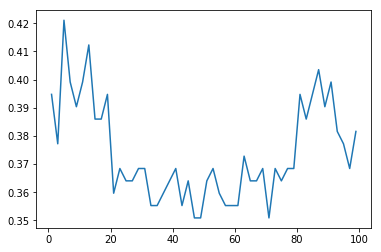

Best Score at K: 5
Final accuracy on train data: 0.6687552213868003
Final accuracy on CV data: 0.42105263157894735
Final accuracy on test data: 0.37185929648241206

Confusion Matrix on Test Data:
102 83 34 27
84 106 26 21
47 69 99 24
83 94 33 63


In [263]:
from sklearn.neighbors import KNeighborsClassifier

k_values = range(1,100,2)
cv_scores= []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, weights="uniform", p=2)
    knn.fit(X_train_w2v,y_train_w2v)
    y_pred = knn.predict(X_cv_w2v)
    cv_scores.append(accuracy_score(y_cv_w2v,y_pred))
    
optimal_k = plotHyperparameterScores(k_values,cv_scores,"accuracy","K")
knn_model = KNeighborsClassifier(n_neighbors=optimal_k, weights="uniform", p=2)
knn_model.fit(X_train_w2v, y_train_w2v)

y_predTrain= knn_model.predict(X_train_w2v)
y_predCV = knn_model.predict(X_cv_w2v)
y_predTest = knn_model.predict(X_test_w2v)
accTrain = accuracy_score(y_train_w2v, y_predTrain)
accCV = accuracy_score(y_cv_w2v, y_predCV)
accTest = accuracy_score(y_test_w2v, y_predTest)
print("Final accuracy on train data:",accTrain)
print("Final accuracy on CV data:",accCV)
print("Final accuracy on test data:",accTest)

print("\nConfusion Matrix on Test Data:")
showCnfMat(y_test_w2v,y_predTest)

### Logistic Regression

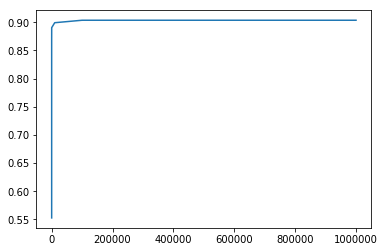

Best Score at C: 100000
Final accuracy on train data: 0.9899749373433584
Final accuracy on CV data: 0.9035087719298246
Final accuracy on test data: 0.821105527638191

Confusion Matrix on Test Data:
195 22 11 18
14 193 10 20
6 15 214 4
19 31 8 215


In [264]:
from sklearn.linear_model import LogisticRegression

C_values=[10**-1,10**0,10**1,10**2,10**4,10**5,10**6]
cv_scores = []

for C in C_values:
    LR = LogisticRegression(C=C, solver="liblinear",multi_class="auto")
    LR.fit(X_train_bow,y_train_bow)
    y_pred = LR.predict(X_cv_bow)
    cv_scores.append(accuracy_score(y_cv_bow,y_pred))
    
optimal_C = plotHyperparameterScores(C_values,cv_scores,"accuracy","C")
LR_model = LogisticRegression(C=optimal_C, solver="liblinear",multi_class="auto")
LR_model.fit(X_train_bow, y_train_bow)

y_predTrain= LR_model.predict(X_train_bow)
y_predCV = LR_model.predict(X_cv_bow)
y_predTest = LR_model.predict(X_test_bow)
accTrain = accuracy_score(y_train_bow, y_predTrain)
accCV = accuracy_score(y_cv_bow, y_predCV)
accTest = accuracy_score(y_test_bow, y_predTest)
print("Final accuracy on train data:",accTrain)
print("Final accuracy on CV data:",accCV)
print("Final accuracy on test data:",accTest)

print("\nConfusion Matrix on Test Data:")
showCnfMat(y_test_bow,y_predTest)

### Multinomial Naive Bayes

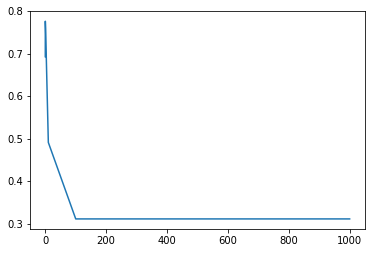

Best Score at alpha: 0.1
Final accuracy on train data: 0.9899749373433584
Final accuracy on CV data: 0.7763157894736842
Final accuracy on test data: 0.735678391959799

Confusion Matrix on Test Data:
191 35 7 13
22 193 8 14
11 31 186 11
27 70 14 162


In [265]:
from sklearn.naive_bayes import MultinomialNB

alpha_values=[10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3]
cv_scores = []

for alpha in alpha_values:
    NB = MultinomialNB(alpha=alpha)
    NB.fit(X_train_bow,y_train_bow)
    y_pred = NB.predict(X_cv_bow)
    cv_scores.append(accuracy_score(y_cv_bow,y_pred))
    
optimal_alpha = plotHyperparameterScores(alpha_values,cv_scores,"accuracy","alpha")
NB_model = MultinomialNB(alpha=optimal_alpha)
NB_model.fit(X_train_bow, y_train_bow)

y_predTrain= NB_model.predict(X_train_bow)
y_predCV = NB_model.predict(X_cv_bow)
y_predTest = NB_model.predict(X_test_bow)
accTrain = accuracy_score(y_train_bow, y_predTrain)
accCV = accuracy_score(y_cv_bow, y_predCV)
accTest = accuracy_score(y_test_bow, y_predTest)
print("Final accuracy on train data:",accTrain)
print("Final accuracy on CV data:",accCV)
print("Final accuracy on test data:",accTest)

print("\nConfusion Matrix on Test Data:")
showCnfMat(y_test_bow,y_predTest)

### Random Forest

In [266]:
from sklearn.ensemble import RandomForestClassifier
   
RF_model = RandomForestClassifier(n_estimators=1000,max_depth=None)
RF_model.fit(X_train_w2v,y_train_w2v)

y_predTrain= RF_model.predict(X_train_w2v)
y_predCV = RF_model.predict(X_cv_w2v)
y_predTest = RF_model.predict(X_test_w2v)
accTrain = accuracy_score(y_train_w2v, y_predTrain)
accCV = accuracy_score(y_cv_w2v, y_predCV)
accTest = accuracy_score(y_test_w2v, y_predTest)
print("Final accuracy on train data:",accTrain)
print("Final accuracy on CV data:",accCV)
print("Final accuracy on test data:",accTest)

print("\nConfusion Matrix on Test Data:")
showCnfMat(y_test_w2v,y_predTest)

Final accuracy on train data: 0.9883040935672515
Final accuracy on CV data: 0.4473684210526316
Final accuracy on test data: 0.40703517587939697

Confusion Matrix on Test Data:
89 133 11 13
42 173 7 15
54 96 81 8
48 147 16 62


### SVM(bow)

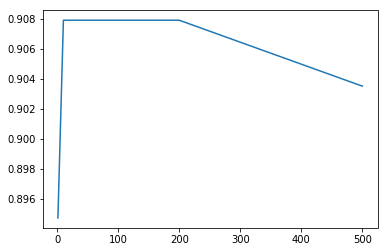

Best Score at C: 10
Final accuracy on train data: 0.9899749373433584
Final accuracy on CV data: 0.9078947368421053
Final accuracy on test data: 0.8251256281407036

Confusion Matrix on Test Data:
196 22 10 18
14 192 11 20
5 14 217 3
17 30 10 216


In [271]:
from sklearn.svm import LinearSVC

C_values=[10**0,10,20,50,80,10**2,120,200,500]
cv_scores = []

for C in C_values:
    SVM = LinearSVC(C = C, dual=False)
    SVM.fit(X_train_bow,y_train_bow)
    y_pred = SVM.predict(X_cv_bow)
    cv_scores.append(accuracy_score(y_cv_bow,y_pred))
    
optimal_C_SVM = plotHyperparameterScores(C_values,cv_scores,"accuracy","C")
SVM_model = LinearSVC(C = optimal_C_SVM, dual=False)
SVM_model.fit(X_train_bow, y_train_bow)

y_predTrain= SVM_model.predict(X_train_bow)
y_predCV = SVM_model.predict(X_cv_bow)
y_predTest = SVM_model.predict(X_test_bow)
accTrain = accuracy_score(y_train_bow, y_predTrain)
accCV = accuracy_score(y_cv_bow, y_predCV)
accTest = accuracy_score(y_test_bow, y_predTest)
print("Final accuracy on train data:",accTrain)
print("Final accuracy on CV data:",accCV)
print("Final accuracy on test data:",accTest)

print("\nConfusion Matrix on Test Data:")
showCnfMat(y_test_bow,y_predTest)

## SVM(w2v)

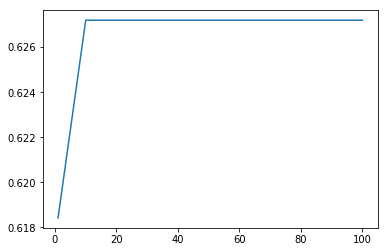

Best Score at C: 10
Final accuracy on train data: 0.7301587301587301
Final accuracy on CV data: 0.6271929824561403
Final accuracy on test data: 0.6321608040201006

Confusion Matrix on Test Data:
158 36 23 29
44 146 22 25
28 27 168 16
32 52 32 157


In [272]:
C_values=[1,10,40,60,100]
cv_scores = []

for C in C_values:
    SVM = LinearSVC(C = C, dual=False)
    SVM.fit(X_train_w2v,y_train_w2v)
    y_pred = SVM.predict(X_cv_w2v)
    cv_scores.append(accuracy_score(y_cv_w2v,y_pred))
    
optimal_C_SVM = plotHyperparameterScores(C_values,cv_scores,"accuracy","C")
SVM_modelW2v = LinearSVC(C = optimal_C_SVM, dual=False)
SVM_modelW2v.fit(X_train_w2v, y_train_w2v)

y_predTrain= SVM_modelW2v.predict(X_train_w2v)
y_predCV = SVM_modelW2v.predict(X_cv_w2v)
y_predTest = SVM_modelW2v.predict(X_test_w2v)
accTrain = accuracy_score(y_train_w2v, y_predTrain)
accCV = accuracy_score(y_cv_w2v, y_predCV)
accTest = accuracy_score(y_test_w2v, y_predTest)
print("Final accuracy on train data:",accTrain)
print("Final accuracy on CV data:",accCV)
print("Final accuracy on test data:",accTest)

print("\nConfusion Matrix on Test Data:")
showCnfMat(y_test_bow,y_predTest)

In [340]:
#Initial Check

user_text = input()

tags = re.compile("^@[a-zA-Z_]*")
user_text = re.sub(tags," ",user_text)
hashtags = re.compile("#|\*")
user_text = re.sub(hashtags,"",user_text)
extraCharacters = re.compile("[^a-zA-Z]")
user_text = re.sub(extraCharacters," ",user_text)
    
filtered_text=""
for word in user_text.split():
    word=word.lower()
    if(word not in stop_bow):
        word = sno.stem(word)
        filtered_text=" "+word

X = normalize(bow_model.transform([filtered_text])).tocsr()
Y = SVM_model.predict(X)
Y = Y[0]
if(Y==0):
    print("Anger")
elif(Y==1):
    print("Fear")
elif(Y==2):
    print("Joy")
else:
    print("Sadness")

hey
Anger
